## 1. The Children of Odin

The log-Likelihood for us is
$$
\ln\mathcal{L}(N)=\ln\begin{pmatrix}N \\ y\end{pmatrix} + y\ln p + \left(N-p\right)\ln\left(1-p\right)
$$
The Maximum likelihood solution can be found via 

[11.13957311]


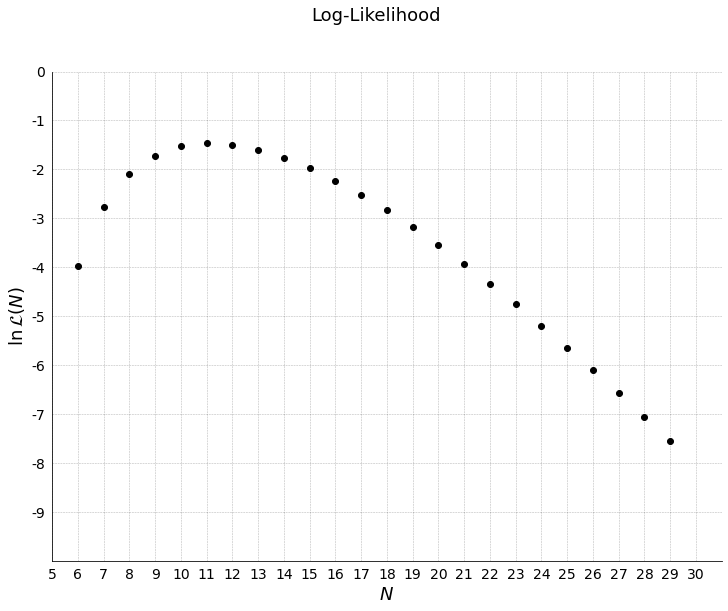

In [1]:
# (a) The Maximum Likelihood estimator
import numpy as np
from scipy.special import comb
from scipy.optimize import minimize
# To render LaTeX formulas on plots
#import matplotlib
#matplotlib.rcParams['text.usetex'] = True
from matplotlib import pyplot as plt


Nmax = 30
p = 0.515            # boy probability
y = 6                # number of sons
N = np.arange(y, Nmax) # number of data points
#plt.plot(N, comb(N, y), 'o')
#plt.plot(N, np.log(comb(N, y)), 'o')


def lnL(N, y=6, p=0.515):
    """
    The log-likelihood implementation
    """
    return np.log(comb(N, y)) + y*np.log(p) + (N-y)*np.log(1-p)

# Here I use the common trick: instead of
# maximising likelihood, I minimise its 
# negative value (since there are many 
# minimisation techniques).
nglnL    = lambda N: -lnL(N, y, p)
solution = minimize(nglnL, np.array(7)) 
#print(solution)
print(solution.x) # <= actual amount of children Odin had

# We can also determine the solution via looking to the graph,
# since the values are integers
    
# You typically want your plot to be ~1.33x wider than tall.  
# Common sizes: (10, 7.5) and (12, 9)  
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
# These are the colors that will be used in the plot
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
# Remove the plot frame lines. They are unnecessary here.
ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
#fig.subplots_adjust(left=.06, right=.95, bottom=.02, top=.84)
# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
ax.set_xlim(5, Nmax+1)
ax.set_ylim(-10, 0)
# Set a fixed location and format for ticks.
ax.set_xticks(range(5, Nmax+1, 1))
ax.set_yticks(range(0, -10, -1))
# Use automatic StrMethodFormatter creation
ax.xaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_major_formatter('{x:.0f}')
# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, which='major', axis='both', ls='--', lw=.5, c='k', alpha=.3)
# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='major', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)

# Make the title big enough so it spans the entire plot, but don't make it
# so big that it requires two lines to show.

# Note that if the title is descriptive enough, it is unnecessary to include
# axis labels; they are self-evident, in this plot's case.
fig.suptitle("Log-Likelihood", fontsize=18, ha="center")

# Setting axes label
ax.set_xlabel(r'$N$', fontsize=18)
ax.set_ylabel(r'$\ln\mathcal{L}\left(N\right)$', fontsize=18)
ax.plot(N, lnL(N), 'o', lw=2.5, color = 'black')
#print(lnL(N))

# Finally, save the figure as a PNG.
# You can also save it as a PDF, JPEG, etc.
# Just change the file extension in this call.
fig.savefig('lnL(N).png', bbox_inches='tight')
plt.show()
#plt.plot(N, lnL(N), 'o')

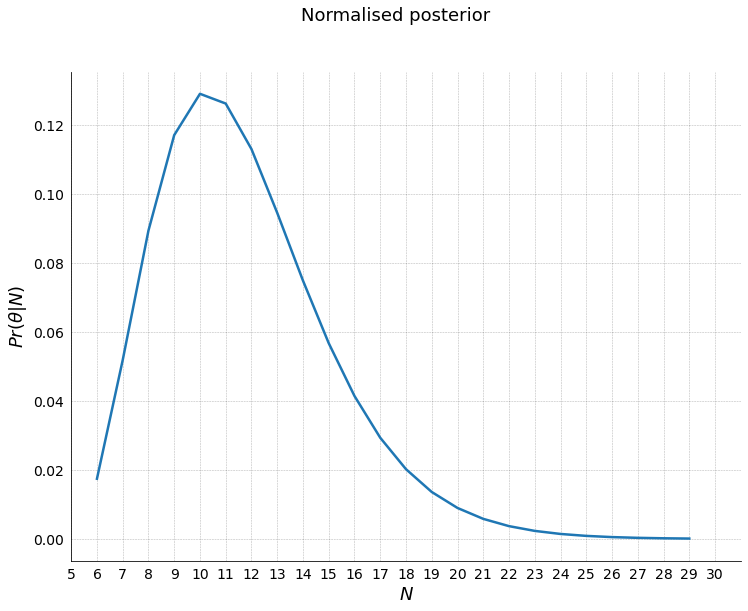

In [5]:
"""
(b) With the prior p0(N )∝1/(N +1), for N = 0, 1, . . . , 50, find and portray the posterior
distribution for the number of Odin’s children. What is a 90 percent credibility interval
for N ?
"""

# P(N|y) = L(N) * P(N)
# P(N) is the prior
# L(N) is the likelihood
# P(N|y) is the posterior probability
#
# We can go to log space again
# lnP(N|y) = lnL(N) + lnP(N)
# the first part is what we calculated before

def lnP(N):
    return -np.log(1+N)

def lnPost(N, y, p):
    return lnL(N, y, p) + lnP(N)

# In not log space
def P(N):
    return 1/(1 + N)

def L(N, y=6, p=0.515):
    return comb(N, y) * p**y * (1-p)**(N-y)

def Post(N, y=6, p=0.515):
    return L(N, y, p)*P(N)
# This is a depiction/portrayal of Posterior Distribution
#plt.plot(N, Post(N))
# TODO: Plot the credibility interval

Nmax=30
# You typically want your plot to be ~1.33x wider than tall.  
# Common sizes: (10, 7.5) and (12, 9)  
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
# These are the colors that will be used in the plot
ax.set_prop_cycle(color=[
    '#1f77b4', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
# Remove the plot frame lines. They are unnecessary here.
ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
#fig.subplots_adjust(left=.06, right=.95, bottom=.02, top=.84)
# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
ax.set_xlim(5, Nmax+1)
#ax.set_ylim(0, 0.5, 0.1)
# Set a fixed location and format for ticks.
ax.set_xticks(range(5, Nmax+1, 1))
#ax.set_yticks(range(0, 1))
# Use automatic StrMethodFormatter creation
ax.xaxis.set_major_formatter('{x:.00f}')
#ax.yaxis.set_major_formatter('{x:.00f}')
# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, which='major', axis='both', ls='--', lw=.5, c='k', alpha=.3)
# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='major', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)

# Make the title big enough so it spans the entire plot, but don't make it
# so big that it requires two lines to show.

# Note that if the title is descriptive enough, it is unnecessary to include
# axis labels; they are self-evident, in this plot's case.
fig.suptitle("Normalised posterior", fontsize=18, ha="center")

# Setting axes label
ax.set_xlabel(r'$N$', fontsize=18)
ax.set_ylabel(r'$Pr\left(\theta|N\right)$', fontsize=18)
#ax.plot(K, myPost(K, Ntot, n, k)/np.sum(myPost(K, Ntot, n, k)), '-', lw=2.5, label=r'own/custom prior')
ax.plot(N, Post(N)/np.sum(Post(N)), '-', lw=2.5)#, label=r'given prior')
#print(lnL(N))

# Finally, save the figure as a PNG.
# You can also save it as a PDF, JPEG, etc.
# Just change the file extension in this call.
fig.savefig('Posterior(N).png', bbox_inches='tight')
plt.show()

MyP is 4.3881268784598956e-08


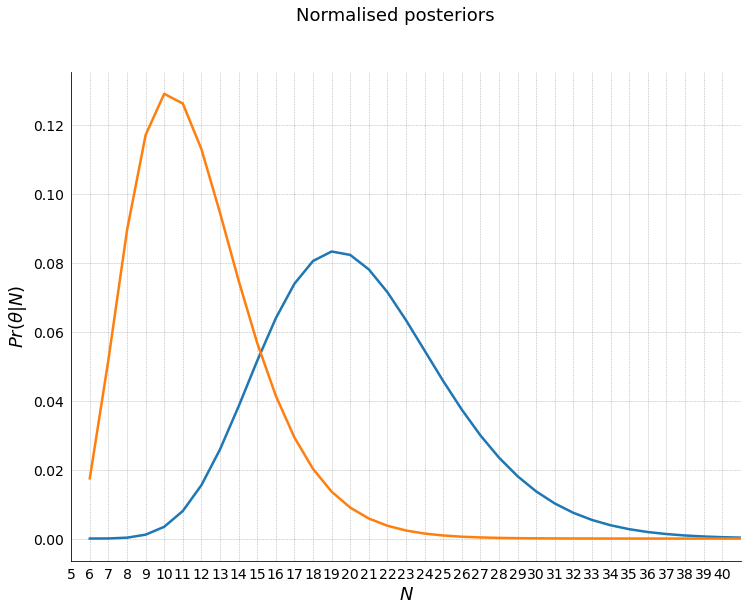

In [3]:
"""
(c) Think for at least three minutes in order to propose your own prior, pmyown(N).
Compute and display the resulting posterior distribution, alongside the previous one.
"""
# I porpose p(N)=N, because why the heck not? Come on, he is a god. 
# For the record, Zeus had tones of children.

# If it is real Binomial it should skew it.

k=6
Ntot=20000
n=40

#def myP(N):
#    return N

#def mylnP(K, N=200000, n=100, k=6):
#    return np.log(comb(K, 6))+np.log(comb((200000-K), 94))#+np.log(comb(N, n))

def myP(K, N, n, k):
    return comb(K, k) * comb((N-K), (n-k)) / comb(N, n)

#print(f"MyP is {myP(100, Ntot, n, k)}")

def myPost(K, N, n, k=6, p=0.515):
    return L(K, k, p)*myP(K, N, n, k)

#print(f"MyPost is {myPost(100, Ntot, n, k)}")

#def mylnPost(K, Ntot=200000, y=6, p=0.515, n=100):
#    #print(mylnP(K, Ntot, n, y))
#    #print(lnL(K, y, p))
#    return lnL(K, y, p) + mylnP(K, Ntot, n, y)

#def myPost(K, Ntot=200000, y=6, p=0.515, n=100):
#    return np.exp(mylnPost(Ntot, K, y, p, n))

#print(myPost(K=100))

Nmax = 40
p = 0.515            # boy probability
y = 6                # number of sons
K = np.arange(y, Ntot+1) # number of data points
#print(K)
#plt.plot(K, myPost(K, Ntot, n, k)/np.sum(myPost(K, Ntot, n, k)))

# This is a depiction/portrayal of Posterior Distribution
# (normalized)
#plt.plot(N, myPost(N)/np.sum(myPost(N)))
#plt.plot(N, Post(N)/np.sum(Post(N)))

# You typically want your plot to be ~1.33x wider than tall.  
# Common sizes: (10, 7.5) and (12, 9)  
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
# These are the colors that will be used in the plot
ax.set_prop_cycle(color=[
    '#1f77b4', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
# Remove the plot frame lines. They are unnecessary here.
ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
#fig.subplots_adjust(left=.06, right=.95, bottom=.02, top=.84)
# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
ax.set_xlim(5, Nmax+1)
#ax.set_ylim(0, 0.5, 0.1)
# Set a fixed location and format for ticks.
ax.set_xticks(range(5, Nmax+1, 1))
#ax.set_yticks(range(0, 1))
# Use automatic StrMethodFormatter creation
ax.xaxis.set_major_formatter('{x:.00f}')
#ax.yaxis.set_major_formatter('{x:.00f}')
# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, which='major', axis='both', ls='--', lw=.5, c='k', alpha=.3)
# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='major', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)

# Make the title big enough so it spans the entire plot, but don't make it
# so big that it requires two lines to show.

# Note that if the title is descriptive enough, it is unnecessary to include
# axis labels; they are self-evident, in this plot's case.
fig.suptitle("Normalised posteriors", fontsize=18, ha="center")

# Setting axes label
ax.set_xlabel(r'$N$', fontsize=18)
ax.set_ylabel(r'$Pr\left(\theta|N\right)$', fontsize=18)
ax.plot(K, myPost(K, Ntot, n, k)/np.sum(myPost(K, Ntot, n, k)), '-', lw=2.5, label=r'own/custom prior')
ax.plot(K, Post(K)/np.sum(Post(K)), '-', lw=2.5, label=r'given prior')
#print(lnL(N))

# Finally, save the figure as a PNG.
# You can also save it as a PDF, JPEG, etc.
# Just change the file extension in this call.
fig.savefig('Posteriors(N).png', bbox_inches='tight')
plt.show()

# TODO:
# (d) Comment on the assumptions underlying the calculations here. <= I believe in this exercise in general

## 